In [ ]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *

     |████████████████████████████████| 179 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 5.6 MB/s 
     |████████████████████████████████| 48 kB 4.4 MB/s 
     |████████████████████████████████| 1.2 MB 13.0 MB/s 
     |████████████████████████████████| 189 kB 33.1 MB/s 
     |████████████████████████████████| 51 kB 289 kB/s 
     |████████████████████████████████| 558 kB 41.9 MB/s 
     |████████████████████████████████| 130 kB 45.4 MB/s 
Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Misc/train.zip
!unzip gdrive/MyDrive/Misc/validation.zip

Archive:  gdrive/MyDrive/Misc/train.zip
   creating: train/
   creating: train/healthy/
   creating: train/angular_leaf_spot/
   creating: train/bean_rust/
  inflating: train/healthy/healthy_train.265.jpg  
  inflating: train/healthy/healthy_train.271.jpg  
  inflating: train/healthy/healthy_train.259.jpg  
  inflating: train/healthy/healthy_train.99.jpg  
  inflating: train/healthy/healthy_train.311.jpg  
  inflating: train/healthy/healthy_train.66.jpg  
  inflating: train/healthy/healthy_train.72.jpg  
  inflating: train/healthy/healthy_train.305.jpg  
  inflating: train/healthy/healthy_train.339.jpg  
  inflating: train/healthy/healthy_train.113.jpg  
  inflating: train/healthy/healthy_train.107.jpg  
  inflating: train/healthy/healthy_train.106.jpg  
  inflating: train/healthy/healthy_train.112.jpg  
  inflating: train/healthy/healthy_train.338.jpg  
  inflating: train/healthy/healthy_train.73.jpg  
  inflating: train/healthy/healthy_train.304.jpg  
  inflating: train/healthy/healt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
classes = 'angular_leaf_spot', 'bean_rust', 'healty'
path = Path('/content')
fns = get_image_files(path, folders=['train', 'validation'])
total = len(fns.items)
corrupted = len(verify_images(fns))
good = total - corrupted
print(f"{good}/{total} Images are valid ({(good/total)*100}%)")

1167/1167 Images are valid (100.0%)


Defined classes are:
*   Angular Leaf Spot (sick)
*   Bean Rust (sick)
*   Healthy

Also validate that image files are not corrupted



In [ ]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders):
    self.loaders = loaders
  
  def __getitem__(self, i):
    return self.loaders[i]

    train, valid = add_props(lambda i, self: self[i])

Configure the DataLoader resnet18 whit resizeing 128

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


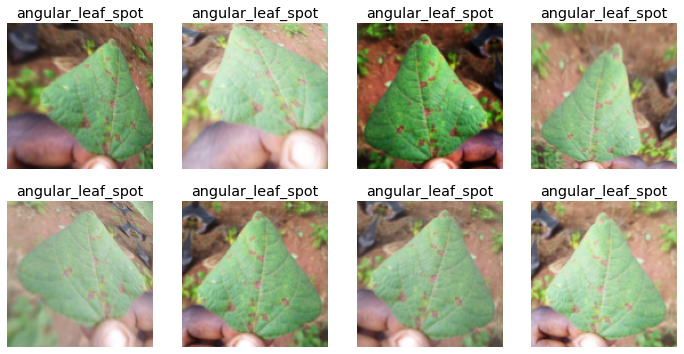

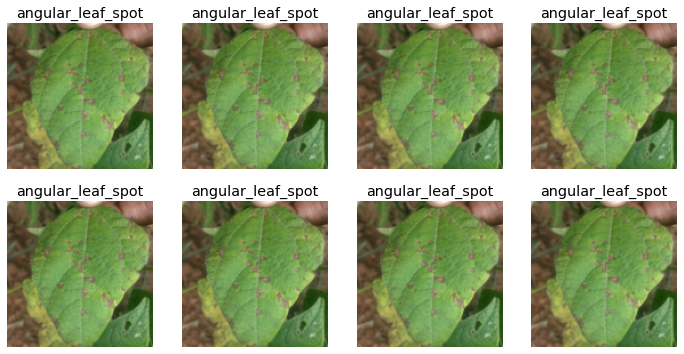

In [ ]:
dls = ImageDataLoaders.from_folder(Path('/content'), train='train', valid='validation', get_y=parent_label, blocks=(ImageBlock, CategoryBlock)
                                  ,item_tfms=Resize(128)
                                  , batch_tfms=aug_transforms(mult=2))

dls.train.show_batch(max_n=8, nrows=2, unique=True)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, pretrained=True)
learn.fine_tune(20, cbs=[EarlyStoppingCallback(patience=5), SaveModelCallback])


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.432878,0.499641,0.819549,00:11


Better model found at epoch 0 with valid_loss value: 0.499640554189682.


epoch,train_loss,valid_loss,accuracy,time
0,0.887953,0.364489,0.857143,00:11
1,0.840536,0.302060,0.879699,00:11
2,0.761244,0.301140,0.864662,00:11
3,0.688351,0.294356,0.894737,00:11
4,0.623783,0.244780,0.909774,00:11
5,0.555195,0.248626,0.909774,00:11
6,0.496624,0.238951,0.917293,00:12
7,0.436710,0.227884,0.924812,00:11
8,0.390304,0.169564,0.962406,00:11
9,0.327215,0.152556,0.947368,00:12


Better model found at epoch 0 with valid_loss value: 0.36448928713798523.
Better model found at epoch 1 with valid_loss value: 0.3020602762699127.
Better model found at epoch 2 with valid_loss value: 0.301140159368515.
Better model found at epoch 3 with valid_loss value: 0.294355571269989.
Better model found at epoch 4 with valid_loss value: 0.2447798252105713.
Better model found at epoch 6 with valid_loss value: 0.23895074427127838.
Better model found at epoch 7 with valid_loss value: 0.2278839647769928.
Better model found at epoch 8 with valid_loss value: 0.1695636510848999.
Better model found at epoch 9 with valid_loss value: 0.1525556743144989.
Better model found at epoch 11 with valid_loss value: 0.14828822016716003.
Better model found at epoch 13 with valid_loss value: 0.14480380713939667.
Better model found at epoch 14 with valid_loss value: 0.13587477803230286.
No improvement since epoch 14: early stopping


Train the model. Use early stopping in order to not overfit and save the model with the least validate loss

In [ ]:
from fastai2.imports import *
from fastai2.torch_core import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()


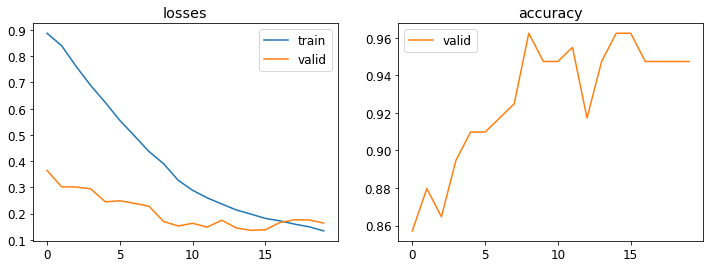

In [ ]:
learn.recorder.plot_metrics()

Configure the DataLoader resnet18 whit  no resizeing

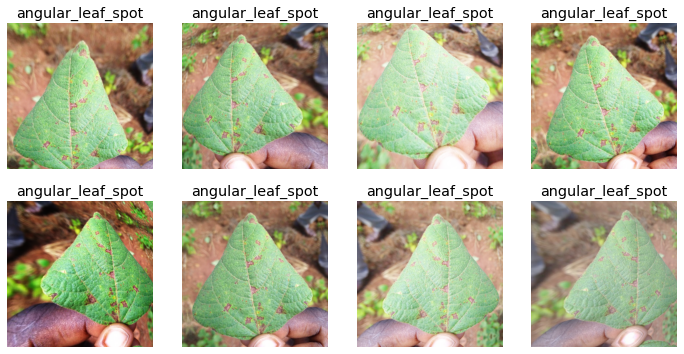

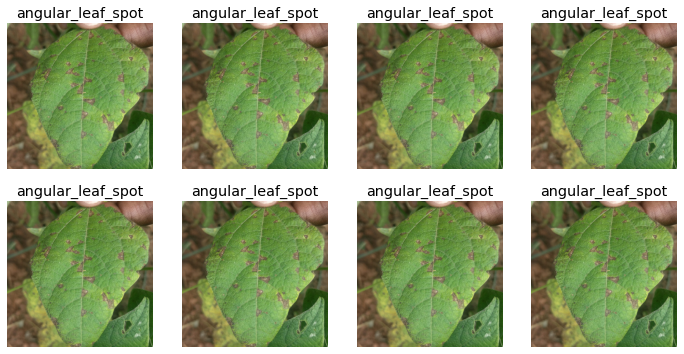

In [ ]:
dls = ImageDataLoaders.from_folder(Path('/content'), train='train', valid='validation', get_y=parent_label, blocks=(ImageBlock, CategoryBlock)
                                  #,item_tfms=Resize(128)
                                  ,batch_tfms=aug_transforms(mult=2))

dls.train.show_batch(max_n=8, nrows=2, unique=True)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, pretrained=True)
learn.fine_tune(20, cbs=[EarlyStoppingCallback(patience=5), SaveModelCallback])


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.135446,0.270275,0.894737,00:49


Better model found at epoch 0 with valid_loss value: 0.27027541399002075.


epoch,train_loss,valid_loss,accuracy,time
0,0.547319,0.166134,0.939850,01:06
1,0.468589,0.123440,0.947368,01:06
2,0.397435,0.103447,0.954887,01:06
3,0.314360,0.084757,0.969925,01:06
4,0.250009,0.078438,0.984962,01:06
5,0.216861,0.079821,0.969925,01:06
6,0.192667,0.067232,0.977444,01:06
7,0.158957,0.043692,0.977444,01:06
8,0.129037,0.072181,0.977444,01:06
9,0.105683,0.031349,0.984962,01:06


Better model found at epoch 0 with valid_loss value: 0.16613371670246124.
Better model found at epoch 1 with valid_loss value: 0.12344042211771011.
Better model found at epoch 2 with valid_loss value: 0.103446826338768.
Better model found at epoch 3 with valid_loss value: 0.08475742489099503.
Better model found at epoch 4 with valid_loss value: 0.0784376710653305.
Better model found at epoch 6 with valid_loss value: 0.06723229587078094.
Better model found at epoch 7 with valid_loss value: 0.04369219392538071.
Better model found at epoch 9 with valid_loss value: 0.03134902939200401.
Better model found at epoch 13 with valid_loss value: 0.02957979403436184.
Better model found at epoch 16 with valid_loss value: 0.022617282345891.
Better model found at epoch 17 with valid_loss value: 0.01929468661546707.


Train the model. Use early stopping in order to not overfit and save the model with the least validate loss

In [ ]:
from fastai2.imports import *
from fastai2.torch_core import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()


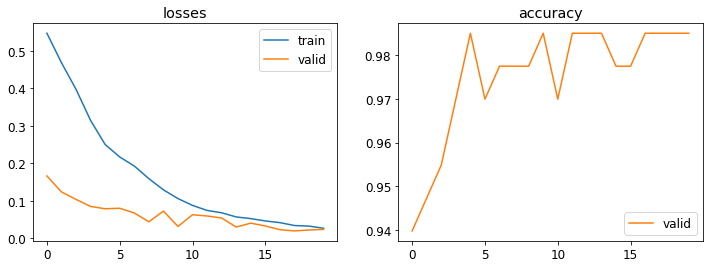

In [ ]:
learn.recorder.plot_metrics()

Configure the DataLoader resnet34 whit no resizeing 

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


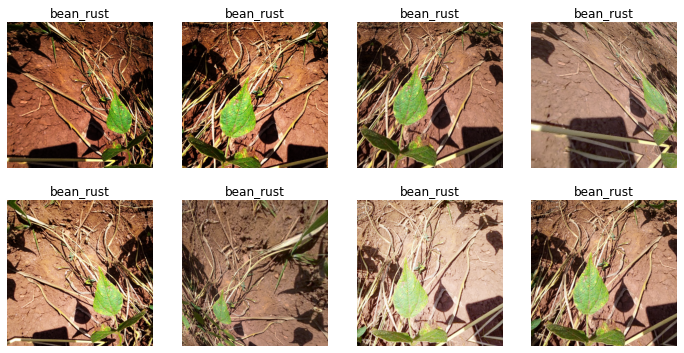

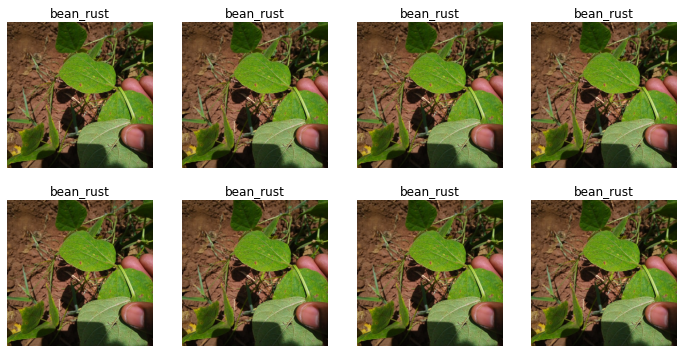

In [ ]:
dls = ImageDataLoaders.from_folder(Path('/content'), train='train', valid='validation', get_y=parent_label, blocks=(ImageBlock, CategoryBlock)
                                  #,item_tfms=Resize(128)
                                  , batch_tfms=aug_transforms(mult=2))

dls.train.show_batch(max_n=8, nrows=2, unique=True)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, pretrained=True)
learn.fine_tune(20, cbs=[EarlyStoppingCallback(patience=5), SaveModelCallback])


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.191005,0.481222,0.864662,01:27


Better model found at epoch 0 with valid_loss value: 0.48122164607048035.


epoch,train_loss,valid_loss,accuracy,time
0,0.494914,0.146272,0.939850,01:59
1,0.383107,0.072376,0.977444,01:58
2,0.300101,0.041263,0.992481,01:58
3,0.244670,0.044324,0.977444,01:58
4,0.202335,0.065808,0.984962,01:58
5,0.176202,0.030004,0.992481,01:58
6,0.159933,0.049737,0.977444,01:58
7,0.136493,0.095934,0.969925,01:58
8,0.108298,0.024108,0.992481,01:58
9,0.090478,0.023517,0.992481,01:58


Better model found at epoch 0 with valid_loss value: 0.14627210795879364.
Better model found at epoch 1 with valid_loss value: 0.0723755806684494.
Better model found at epoch 2 with valid_loss value: 0.04126279801130295.
Better model found at epoch 5 with valid_loss value: 0.030004354193806648.
Better model found at epoch 8 with valid_loss value: 0.024108242243528366.
Better model found at epoch 9 with valid_loss value: 0.023516682907938957.
No improvement since epoch 9: early stopping


Train the model. Use early stopping in order to not overfit and save the model with the least validate loss

In [ ]:
from fastai2.imports import *
from fastai2.torch_core import *
    
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()


In [ ]:
learn.recorder.plot_metrics()